In [1]:
from sklearn import datasets, naive_bayes, model_selection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Biri whatsapp grubuna mesaj atmis, bu kim olabilir desem ne derdiniz?

(Mesajla ilgili hicbir bilgi verilmeden)

In [2]:
data = pd.read_csv("Bilimciler_temiz.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Bilimciler_temiz.csv'

In [3]:
data['sender'].value_counts(1).head(14).rename("Mesaj frekanslari")

NameError: name 'data' is not defined

$P(kisi=Ersan) = 0.092671$  
Ersan'in grup mesajlarindaki genel payi, bu mesajin Ersan'dan gelmis olma olasiliginin iyi bir gostergesi olabilirdi.

Bu olasilik, **Prior**'dur. Mesajla ilgili henuz bir sey bilmeden mesajin bir kisiye ait olduguna dair inanciniz.

Mesajin icerigi verilmis olsaydi, fikriniz mutalaka degisirdi:

P(kisi=Ersan | Mesaj="Abi pandasa bakin") = 0.34 (rakam gercek degil temsilidir)

---

### Notasyon

Ornek bir problem ile ifadelerin nasil formullere cevrildigini gorelim:

E: hatali urun - defolu
A ve B: tezgah isimleri

Bir fabrikadaki urunlerin %60'i A tezgahinda, %40'i B tezgahinda uretilmektedir.

A tezgahindan cikan urunlerin %10'u defolu, B tezgahindan cikan urunlerin %5'inin defolu oldugu bilinmektedir.

Bu problemi asagidaki gibi formulize edebilirdik;

- $P(A) = 0.6$ Rastgele cekilen bir urunun A tezgahinda uretilmis olma olasiligi
- $P(B) = 0.4$ Rastgele cekilen bir urunun B tezgahinda uretilmis olma olasiligi 
---
- $P(E | A) = 0.1$ Urunun A tezgahindan geldigi bilindigine gore defolu olma olasiligi
- $P(E | B) = 0.05$ Urunun B tezgahindan geldigi bilindigine gore defolu olma olasiligi

Cekilen bir urun defolu olduguna gore A tezgahindan gelmis olma olasiligi $P(A | E)$ nedir?

$P(A | E) = ?$

## Bayes Teoremi:

$$P(A | E) = \frac{P(E | A) P(A)}{P(E)}$$

$P(E|A)$ ve $P(A)$ halihazirda bize verilmis. $P(E)$'yi hesaplayarak kesin bir olasilik soyleyebilirdik.

*Ancak, olasilik vermek yerine bu konuda kesin bir karar verecek olsaydik (A'dan gelmistir ya da B'den gelmistir gibi), olasiligi yuksek secenegi secerdik*

Kiyaslama icin yeterli:

- $P(A | E) \propto P(A) P(E | A)$
- $P(B | E) \propto P(B) P(E | B)$

Payda $P(E)$, her iki terimde de ayni oldugu icin kiyaslamayi pay uzerinden yapabiliriz.

**Mesaj olaylarina donersek:**

Mesaj verildigine gore gondericinin belirli bir kisi olma olasiligini asagidaki gibi acabilirdik:

- P(kisi=Ersan | Mesaj="Abi pandasa bakin") = P(mesaj | Ersan) P(Ersan) / P(mesaj)
- P(kisi=Sukru | Mesaj="Abi pandasa bakin") = P(mesaj | Sukru) P(Sukru) / P(mesaj)
- ...
- P(kisi=kisi[i] | Mesaj="Abi pandasa bakin") = P(mesaj | kisi[i]) P(kisi[i]) / P(mesaj)

$P(kisi=Ersan | Mesaj="Abi\ pandasa\ bakin") \propto P(mesaj | Ersan) P(Ersan)$

Peki bu $P(mesaj | Ersan) P(Ersan)$ terimini nasil parcalayabiliriz?





Naive bayes -> Naive: feature'larin birbirinden bagimsiz oldugunun kabulu

$$P(mesaj | Ersan) = P(Abi | Ersan) P(pandas | Ersan) P(bakin | Ersan)$$


P(Abi) = P(Abi | pandas)  
P(kankalar) = P(kankalar | gunaydin)


### Devamli degiskenlerde bagimsizlik

In [5]:
import scipy.stats as scs
import numpy as np

In [6]:
xx, yy = np.meshgrid(np.linspace(-8, 8, 300), np.linspace(-6, 6, 300))

In [308]:
dagilim = scs.multivariate_normal([0, 0], [1, 3])
zz = dagilim.pdf(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)

##### Bagimsiz degiskenlerde kovaryans

Bagimsiz degiskenlerde yalnizca diyagonel elemanlar 0'dan farklidir.

In [617]:
np.cov(dagilim.rvs(100000).T)

array([[1.00239109, 0.00985279],
       [0.00985279, 2.9925725 ]])

Bu elemanlar da, her feature'in kendi varyansini gosterir.

In [618]:
np.var(dagilim.rvs(100000), axis=0)

array([0.9992275 , 3.00495557])

Yaklasik olarak ayni.

Benzer maksatli standart bir olcum olan korealsyonu daha once gormustuk:

In [621]:
np.corrcoef(dagilim.rvs(100000).T)

array([[ 1.00000000e+00, -9.07318154e-04],
       [-9.07318154e-04,  1.00000000e+00]])

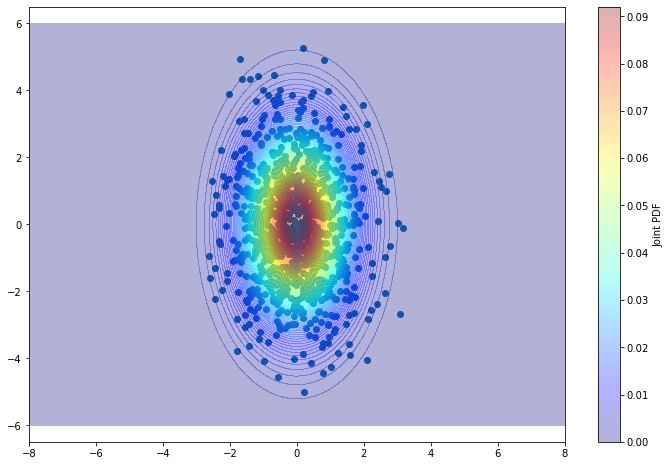

In [310]:
plt.figure(figsize=(12, 8))
plt.scatter(*dagilim.rvs(1000).T)
plt.contourf(xx, yy, zz, cmap='jet', levels=100, alpha=0.3)
plt.colorbar().set_label("Joint PDF")
plt.axis('equal');

Yukaridaki dagilimdan, $x_1$ degeri $[0, 1]$ araliginda cektigimiz 1000 ornek ile $[1, 2]$ araliginda cektigimiz 1000 ornegin ortalamalarini kiyaslasak bir fark gorur muyduk?

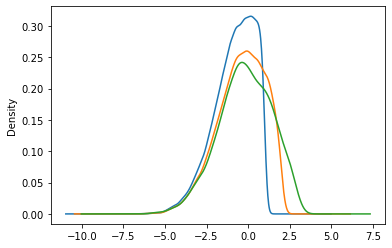

In [360]:
X = dagilim.rvs(100000)
pd.Series(X[(X[:, 0] >= 0) & (X[:, 1] <= 1)][:, 1]).plot(kind='kde')
pd.Series(X[(X[:, 0] >= 1) & (X[:, 1] <= 2)][:, 1]).plot(kind='kde')
pd.Series(X[(X[:, 0] >= 2) & (X[:, 1] <= 3)][:, 1]).plot(kind='kde');

Ortalamalarin ayni oldugu gozukuyor.

In [362]:
bg_dagilim = scs.multivariate_normal([0, 0], [[1.0, 0.9], [0.9, 1.0]])

zz = bg_dagilim.pdf(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)

(-8.0, 8.0, -6.0, 6.0)

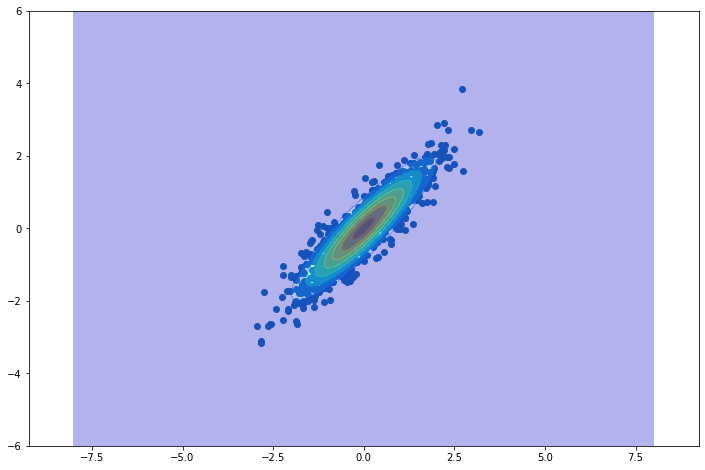

In [367]:
plt.figure(figsize=(12, 8))
plt.scatter(*bg_dagilim.rvs(1000).T)
plt.contourf(xx, yy, zz, alpha=0.3, cmap='jet')
plt.axis('equal')

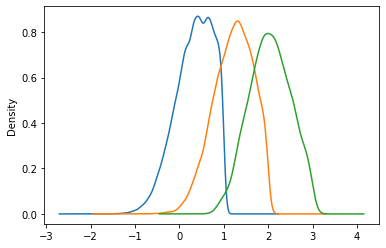

In [368]:
X = bg_dagilim.rvs(100000)
pd.Series(X[(X[:, 0] >= 0) & (X[:, 1] <= 1)][:, 1]).plot(kind='kde')
pd.Series(X[(X[:, 0] >= 1) & (X[:, 1] <= 2)][:, 1]).plot(kind='kde')
pd.Series(X[(X[:, 0] >= 2) & (X[:, 1] <= 3)][:, 1]).plot(kind='kde');

Secilen araliga gore ortalamalar farklilik gosterdi. Bu durumda, $x_1$ ve $x_2$ bagimsizdir demek mumkun mu?

##### Bagimli degiskenlerde kovaryans

In [619]:
np.cov(bg_dagilim.rvs(100000).T)

array([[1.00456179, 0.9052143 ],
       [0.9052143 , 1.00537111]])

In [622]:
np.corrcoef(bg_dagilim.rvs(100000).T)

array([[1.        , 0.89941215],
       [0.89941215, 1.        ]])

Diyagonel haricindeki elemanlarin 0'dan farkli olmasi, degiskenlerin bagimli oldugunu gosterir.

In [620]:
np.var(bg_dagilim.rvs(100000), axis=0)

array([1.00773642, 1.00522827])

## Naive Bayes ile metin tasniflendirme

In [370]:
data = pd.read_csv("Bilimciler_temiz.csv")


In [371]:
from sklearn import feature_extraction, naive_bayes, preprocessing

In [372]:
vectorizer = feature_extraction.text.CountVectorizer()
vectorizer.fit(data['message'])

CountVectorizer()

In [373]:
X = vectorizer.transform(data['message'])
y = data['y']

In [374]:
data['message'][5]

'Salı ve perşembe akşam 10da buluşalım bu hafta datayı sonlandıralım beraber tamamen. Çözümleri konuşalım artık.'

### Bag of Words

In [375]:
pd.DataFrame(X.toarray()).rename(columns={v:k for k, v in vectorizer.vocabulary_.items()})

,00,0001,00da,01,0130,01_data_science,06,08,10,100,...,şişirmeyeyim,şte,şu,şuan,şurda,şöyle,şükrü,şükrüden,şükrüyle,şükür
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [388]:
ornek_mesaj = 'tam zamanında gülmek getirip gitti ❤'
pd.DataFrame(vectorizer.transform([ornek_mesaj]).toarray()) \
    .rename(columns={v:k for k, v in vectorizer.vocabulary_.items()}) \
    .loc[0] \
    .sort_values(ascending=False)

gitti       1
tam         1
00          0
olayi       0
olanlara    0
           ..
ettim       0
ettin       0
evde        0
evdeyim     0
şükür       0
Name: 0, Length: 2737, dtype: int64

Egitim setinde gordugumuz her bir ozel kelime bir "feature"i temsil ediyor. Ornek mesaji bu sekilde vektorize ettik.

In [499]:
model = naive_bayes.BernoulliNB(alpha=0)

In [500]:
model.fit(X, data['sender'])

C:\Users\berk_\miniconda3\envs\cons1\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


BernoulliNB(alpha=0)

In [398]:
model.classes_

array(['Abdullah Atçılı', 'Adem Tekinbaş', 'Ahmet Umit Çalışkan',
       'Emre Kopuz', 'Ersan Yagci', 'Fethi Bam Bam',
       'Muzaffer Selim Yakasız', 'Sinan Yilmaz', 'Talip Akdemir',
       'Yusuf Can', 'reis', 'reis: Iki opsiyon var', 'reis: konular',
       'reis: ucuncusu de Lineer Regression', 'Ömer Esin Yıldız',
       'İbrahim Halil Kaplan', '\u202aEngin\u202c'], dtype='<U35')

In [412]:
olasiliklar = model.predict_proba(vectorizer.transform(["tam zamanında gülmek getirip gitti ❤"]))[0]

In [413]:
olasiliklar

array([8.80437455e-022, 1.86732628e-020, 1.85120370e-021, 7.73621451e-021,
       1.92703966e-011, 1.21610904e-019, 9.87674261e-021, 1.00000000e+000,
       1.06980856e-019, 4.12252148e-011, 5.72317144e-022, 3.37538158e-077,
       3.37538242e-107, 3.37538018e-027, 7.03632758e-022, 3.57310084e-020,
       7.52594709e-021])

In [414]:
pd.Series(olasiliklar,
         index=model.classes_).sort_values(ascending=False)

Sinan Yilmaz                            1.000000e+00
Yusuf Can                               4.122521e-11
Ersan Yagci                             1.927040e-11
Fethi Bam Bam                           1.216109e-19
Talip Akdemir                           1.069809e-19
İbrahim Halil Kaplan                    3.573101e-20
Adem Tekinbaş                           1.867326e-20
Muzaffer Selim Yakasız                  9.876743e-21
Emre Kopuz                              7.736215e-21
‪Engin‬                                 7.525947e-21
Ahmet Umit Çalışkan                     1.851204e-21
Abdullah Atçılı                         8.804375e-22
Ömer Esin Yıldız                        7.036328e-22
reis                                    5.723171e-22
reis: ucuncusu de Lineer Regression     3.375380e-27
reis: Iki opsiyon var                   3.375382e-77
reis: konular                          3.375382e-107
dtype: float64

Model neden Sinan'dan bu kadar emin?

In [415]:
sayilar = pd.DataFrame(X.toarray(), index=data.index).rename(columns={v:k for k, v in vectorizer.vocabulary_.items()})

In [424]:
sayilar.reindex(['tam', "zamanında", "gülmek", "getirip", "gitti", "❤"], axis=1).assign(sender=data['sender']) \
    .groupby('sender').mean().style \
    .highlight_max(subset=['gitti'], color='green') \
    .highlight_min(subset=['gitti'], color='red')


,tam,zamanında,gülmek,getirip,gitti,❤
sender,,,,,,
Abdullah Atçılı,0.000000,nan,nan,nan,0.000000,nan
Adem Tekinbaş,0.000000,nan,nan,nan,0.000000,nan
Ahmet Umit Çalışkan,0.000000,nan,nan,nan,0.000000,nan
Emre Kopuz,0.000000,nan,nan,nan,0.000000,nan
Ersan Yagci,0.027273,nan,nan,nan,0.000000,nan
Fethi Bam Bam,0.000000,nan,nan,nan,0.000000,nan
Muzaffer Selim Yakasız,0.000000,nan,nan,nan,0.000000,nan
Sinan Yilmaz,0.030303,nan,nan,nan,0.015152,nan
Talip Akdemir,0.000000,nan,nan,nan,0.000000,nan


"gitti" kelimesini egitim setinde Sinan'dan baska kimse kullanmadi. Bu durumda

$$P(kisi=Muzo | mesaj) = P(gitti | Muzo) P(tam| Muzo) = 0$$
$$P(kisi=Apo | mesaj) = P(gitti | Apo) P(tam| Apo) = 0$$
....

Bu gormeyi arzu ettiginiz bir durum mu?

## Smoothing

Egitim setinde kullanmadigi kelimeleri kisinin test setinde kullanmasi halinde, bu kisiler icin olasilik 0.0 olarak hesaplanacakti. Normalize edilmis orijinal frekanslari asagida gozlemleyelim:

In [427]:
pd.DataFrame(X.toarray(), index=data.index).rename(columns={v:k for k, v in vectorizer.vocabulary_.items()}) \
    .assign(sender=data['sender']).groupby('sender').sum().apply(lambda x: x / x.sum(), axis=0)

,00,0001,00da,01,0130,01_data_science,06,08,10,100,...,şişirmeyeyim,şte,şu,şuan,şurda,şöyle,şükrü,şükrüden,şükrüyle,şükür
sender,,,,,,,,,,,,,,,,,,,,,
Abdullah Atçılı,0.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.166667,1.0,...,0.0,0.0,0.2,0.0,0.0,0.0,0.380952,0.0,0.0,0.0
Adem Tekinbaş,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Ahmet Umit Çalışkan,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.2,0.0,0.0,0.0,0.190476,1.0,1.0,1.0
Emre Kopuz,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0
Ersan Yagci,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,...,0.0,1.0,0.4,0.0,1.0,0.0,0.190476,0.0,0.0,0.0
Fethi Bam Bam,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Muzaffer Selim Yakasız,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.0,0.0
Sinan Yilmaz,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,...,0.0,0.0,0.2,1.0,0.0,0.5,0.000000,0.0,0.0,0.0
Talip Akdemir,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


Tum frekanslari 1 arttirsak, aradaki buyukluk-kucukluk iliskisini halen korurken 0 olasilik problemini cozebilir miydik? 

In [428]:
pd.DataFrame(X.toarray(), index=data.index).rename(columns={v:k for k, v in vectorizer.vocabulary_.items()}) \
    .assign(sender=data['sender']).groupby('sender').sum().__add__(1).apply(lambda x: x / x.sum(), axis=0)

,00,0001,00da,01,0130,01_data_science,06,08,10,100,...,şişirmeyeyim,şte,şu,şuan,şurda,şöyle,şükrü,şükrüden,şükrüyle,şükür
sender,,,,,,,,,,,,,,,,,,,,,
Abdullah Atçılı,0.047619,0.055556,0.157895,0.045455,0.055556,0.111111,0.055556,0.055556,0.086957,0.111111,...,0.055556,0.055556,0.090909,0.055556,0.055556,0.052632,0.236842,0.055556,0.055556,0.055556
Adem Tekinbaş,0.047619,0.055556,0.052632,0.045455,0.055556,0.055556,0.055556,0.055556,0.043478,0.055556,...,0.055556,0.055556,0.045455,0.055556,0.055556,0.052632,0.026316,0.055556,0.055556,0.055556
Ahmet Umit Çalışkan,0.047619,0.055556,0.052632,0.045455,0.055556,0.055556,0.055556,0.111111,0.043478,0.055556,...,0.055556,0.055556,0.090909,0.055556,0.055556,0.052632,0.131579,0.111111,0.111111,0.111111
Emre Kopuz,0.047619,0.055556,0.052632,0.045455,0.055556,0.055556,0.055556,0.055556,0.043478,0.055556,...,0.055556,0.055556,0.045455,0.055556,0.055556,0.052632,0.105263,0.055556,0.055556,0.055556
Ersan Yagci,0.047619,0.055556,0.052632,0.045455,0.055556,0.055556,0.055556,0.055556,0.086957,0.055556,...,0.055556,0.111111,0.136364,0.055556,0.111111,0.052632,0.131579,0.055556,0.055556,0.055556
Fethi Bam Bam,0.047619,0.055556,0.052632,0.045455,0.055556,0.055556,0.055556,0.055556,0.043478,0.055556,...,0.055556,0.055556,0.045455,0.055556,0.055556,0.052632,0.026316,0.055556,0.055556,0.055556
Muzaffer Selim Yakasız,0.047619,0.055556,0.052632,0.045455,0.055556,0.055556,0.055556,0.055556,0.043478,0.055556,...,0.055556,0.055556,0.045455,0.055556,0.055556,0.052632,0.052632,0.055556,0.055556,0.055556
Sinan Yilmaz,0.047619,0.055556,0.052632,0.045455,0.055556,0.055556,0.055556,0.055556,0.130435,0.055556,...,0.055556,0.055556,0.090909,0.111111,0.055556,0.105263,0.026316,0.055556,0.055556,0.055556
Talip Akdemir,0.047619,0.055556,0.052632,0.045455,0.055556,0.055556,0.055556,0.055556,0.043478,0.055556,...,0.055556,0.055556,0.045455,0.055556,0.055556,0.052632,0.026316,0.055556,0.055556,0.055556


Yapilan duzleme islemi, muhakkak frekanslar arasindaki iliskiyi etkileyecektir. Cok yuksek bir sayi ile duzleme yapilan asagidaki senaryoyu dusunelim:

In [429]:
pd.DataFrame(X.toarray(), index=data.index).rename(columns={v:k for k, v in vectorizer.vocabulary_.items()}) \
    .assign(sender=data['sender']).groupby('sender').sum().__add__(1000).apply(lambda x: x / x.sum(), axis=0)

,00,0001,00da,01,0130,01_data_science,06,08,10,100,...,şişirmeyeyim,şte,şu,şuan,şurda,şöyle,şükrü,şükrüden,şükrüyle,şükür
sender,,,,,,,,,,,,,,,,,,,,,
Abdullah Atçılı,0.058810,0.058820,0.058934,0.058806,0.058820,0.058879,0.058820,0.058820,0.058862,0.058879,...,0.058820,0.058820,0.058865,0.058820,0.058820,0.058817,0.059221,0.058820,0.058820,0.058820
Adem Tekinbaş,0.058810,0.058820,0.058817,0.058806,0.058820,0.058820,0.058820,0.058820,0.058803,0.058820,...,0.058820,0.058820,0.058806,0.058820,0.058820,0.058817,0.058751,0.058820,0.058820,0.058820
Ahmet Umit Çalışkan,0.058810,0.058820,0.058817,0.058806,0.058820,0.058820,0.058820,0.058879,0.058803,0.058820,...,0.058820,0.058820,0.058865,0.058820,0.058820,0.058817,0.058986,0.058879,0.058879,0.058879
Emre Kopuz,0.058810,0.058820,0.058817,0.058806,0.058820,0.058820,0.058820,0.058820,0.058803,0.058820,...,0.058820,0.058820,0.058806,0.058820,0.058820,0.058817,0.058927,0.058820,0.058820,0.058820
Ersan Yagci,0.058810,0.058820,0.058817,0.058806,0.058820,0.058820,0.058820,0.058820,0.058862,0.058820,...,0.058820,0.058879,0.058924,0.058820,0.058879,0.058817,0.058986,0.058820,0.058820,0.058820
Fethi Bam Bam,0.058810,0.058820,0.058817,0.058806,0.058820,0.058820,0.058820,0.058820,0.058803,0.058820,...,0.058820,0.058820,0.058806,0.058820,0.058820,0.058817,0.058751,0.058820,0.058820,0.058820
Muzaffer Selim Yakasız,0.058810,0.058820,0.058817,0.058806,0.058820,0.058820,0.058820,0.058820,0.058803,0.058820,...,0.058820,0.058820,0.058806,0.058820,0.058820,0.058817,0.058810,0.058820,0.058820,0.058820
Sinan Yilmaz,0.058810,0.058820,0.058817,0.058806,0.058820,0.058820,0.058820,0.058820,0.058920,0.058820,...,0.058820,0.058820,0.058865,0.058879,0.058820,0.058875,0.058751,0.058820,0.058820,0.058820
Talip Akdemir,0.058810,0.058820,0.058817,0.058806,0.058820,0.058820,0.058820,0.058820,0.058803,0.058820,...,0.058820,0.058820,0.058806,0.058820,0.058820,0.058817,0.058751,0.058820,0.058820,0.058820


"Feature"lar bilgi verici ozelliklerini kaybetmeye basladi.

In [73]:
pd.DataFrame(X.toarray()).rename(columns={v:k for k, v in vectorizer.vocabulary_.items()}).loc[2].loc[lambda x: x==1]

10da         1
akşam        1
cumartesi    1
dersi        1
giriş        1
ilk          1
learninge    1
machine      1
vericek      1
yapıcak      1
üstat        1
şükrü        1
Name: 2, dtype: int64

In [ ]:
P(Ersan | mesaj) = P(mesaj | Ersan) P(Ersan)

In [457]:
duzlemeli_model = naive_bayes.BernoulliNB(alpha=1e-1)

In [458]:
duzlemeli_model.fit(X, data['sender'])

BernoulliNB(alpha=0.1)

In [459]:
duzlemeli_olasiliklar = duzlemeli_model.predict_proba(vectorizer.transform(["tam zamanında gülmek getirip gitti ❤"]))[0]

0.1 duzleme ile alinan sonuclar ciddi degisiklik gosterdi. Cumlede "tam" kelimesi geciyor diye artik %100 Sinan demiyoruz.

In [460]:
pd.Series(duzlemeli_olasiliklar,
         index=duzlemeli_model.classes_).sort_values(ascending=False)

Sinan Yilmaz                            7.408438e-01
Yusuf Can                               1.025093e-01
Ersan Yagci                             6.667942e-02
Muzaffer Selim Yakasız                  4.909161e-02
Ahmet Umit Çalışkan                     2.127406e-02
Abdullah Atçılı                         7.201146e-03
Emre Kopuz                              6.276602e-03
reis                                    2.760513e-03
‪Engin‬                                 2.115876e-03
Adem Tekinbaş                           9.703893e-04
Ömer Esin Yıldız                        2.170271e-04
İbrahim Halil Kaplan                    6.023070e-05
Talip Akdemir                           1.141241e-14
Fethi Bam Bam                           4.233757e-23
reis: ucuncusu de Lineer Regression    3.794551e-102
reis: Iki opsiyon var                  2.356118e-107
reis: konular                          1.770186e-110
dtype: float64

Biraz daha duzleme ile daha dramatik sonuclar aliyoruz:

In [475]:
duzlemeli_model = naive_bayes.BernoulliNB(alpha=1.)

In [476]:
duzlemeli_model.fit(X, data['sender'])

BernoulliNB()

In [477]:
duzlemeli_olasiliklar = duzlemeli_model.predict_proba(vectorizer.transform(["tam zamanında gülmek getirip gitti ❤"]))[0]

0.1 duzleme ile alinan sonuclar ciddi degisiklik gosterdi. Cumlede "tam" kelimesi geciyor diye artik %100 Sinan demiyoruz.

In [478]:
pd.Series(duzlemeli_olasiliklar,
         index=duzlemeli_model.classes_).sort_values(ascending=False)

Ahmet Umit Çalışkan                     9.822266e-01
Abdullah Atçılı                         1.633059e-02
Muzaffer Selim Yakasız                  1.375381e-03
reis                                    5.940648e-05
Ersan Yagci                             7.524454e-06
Yusuf Can                               5.252875e-07
Emre Kopuz                              2.440761e-11
Sinan Yilmaz                            9.883917e-12
‪Engin‬                                 9.278414e-16
Ömer Esin Yıldız                        2.100927e-16
Adem Tekinbaş                           2.702034e-22
İbrahim Halil Kaplan                    9.476172e-36
Talip Akdemir                          9.808826e-119
Fethi Bam Bam                          1.327570e-176
reis: Iki opsiyon var                   0.000000e+00
reis: konular                           0.000000e+00
reis: ucuncusu de Lineer Regression     0.000000e+00
dtype: float64

Peki, frekanslarda Sinan'in ciddi avantaji olmasina ragmen nasil bu sonucu aldik?

**Prior**

Asiri duzleme, feature'larin ayirt edici gucunu yok etti ve kararimizda **prior**larin ciddi etkisini goruyoruz (Sinan genelde cok az, Ahmet Umit ise cok fazla mesaj atiyor - mesaj icerigine bakmaksizin.)

**Uniform prior** durumunda - mesaj icerigine bakmaksizin herhangi birine ait olma olasiliklari esit olsaydi modelimizin kararlari ne olacakti?

In [480]:
uniform_model = naive_bayes.BernoulliNB(alpha=1., fit_prior=False)
uniform_model.fit(X, data['sender'])
uniform_olasiliklar = uniform_model.predict_proba(vectorizer.transform(["tam zamanında gülmek getirip gitti ❤"]))[0]
pd.Series(uniform_olasiliklar,
         index=uniform_model.classes_).sort_values(ascending=False)

Ahmet Umit Çalışkan                     9.769161e-01
Abdullah Atçılı                         2.068060e-02
Muzaffer Selim Yakasız                  2.286870e-03
reis                                    1.003076e-04
Ersan Yagci                             1.489951e-05
Yusuf Can                               1.204379e-06
Emre Kopuz                              7.594809e-11
Sinan Yilmaz                            3.261932e-11
‪Engin‬                                 3.674521e-15
Ömer Esin Yıldız                        8.171703e-16
Adem Tekinbaş                           1.435478e-21
İbrahim Halil Kaplan                    7.644672e-35
Talip Akdemir                          2.670649e-117
Fethi Bam Bam                          5.783318e-175
reis: Iki opsiyon var                   0.000000e+00
reis: konular                           0.000000e+00
reis: ucuncusu de Lineer Regression     0.000000e+00
dtype: float64

In [481]:
np.exp(uniform_model.class_log_prior_)

array([0.05882353, 0.05882353, 0.05882353, 0.05882353, 0.05882353,
       0.05882353, 0.05882353, 0.05882353, 0.05882353, 0.05882353,
       0.05882353, 0.05882353, 0.05882353, 0.05882353, 0.05882353,
       0.05882353, 0.05882353])

## Karar dinamikleri

Uniform prior

In [495]:
pd.DataFrame(uniform_model.feature_log_prob_,
            index=uniform_model.classes_,
            ).rename(columns={v: k for k, v in vectorizer.vocabulary_.items()}) \
    .reindex(['tam', 'zamanında', 'gülmek', 'getirip', 'gitti'], axis=1).pipe(np.exp) \
    .assign(priors=np.exp(uniform_model.class_log_prior_))

,tam,zamanında,gülmek,getirip,gitti,priors
Abdullah Atçılı,0.005747,NaN,NaN,NaN,0.005747,0.058824
Adem Tekinbaş,0.023256,NaN,NaN,NaN,0.023256,0.058824
Ahmet Umit Çalışkan,0.004525,NaN,NaN,NaN,0.004525,0.058824
Emre Kopuz,0.013889,NaN,NaN,NaN,0.013889,0.058824
Ersan Yagci,0.035714,NaN,NaN,NaN,0.008929,0.058824
Fethi Bam Bam,0.142857,NaN,NaN,NaN,0.142857,0.058824
Muzaffer Selim Yakasız,0.007519,NaN,NaN,NaN,0.007519,0.058824
Sinan Yilmaz,0.044118,NaN,NaN,NaN,0.029412,0.058824
Talip Akdemir,0.100000,NaN,NaN,NaN,0.100000,0.058824
Yusuf Can,0.020619,NaN,NaN,NaN,0.010309,0.058824


Prior'lar veriden hesaplandiginda

In [501]:
pd.DataFrame(duzlemeli_model.feature_log_prob_,
            index=duzlemeli_model.classes_,
            ).rename(columns={v: k for k, v in vectorizer.vocabulary_.items()}) \
    .reindex(['tam', 'zamanında', 'gülmek', 'getirip', 'gitti', '❤'], axis=1).pipe(np.exp) \
    .assign(priors=np.exp(duzlemeli_model.class_log_prior_))

,tam,zamanında,gülmek,getirip,gitti,❤,priors
Abdullah Atçılı,0.005747,NaN,NaN,NaN,0.005747,NaN,0.144903
Adem Tekinbaş,0.023256,NaN,NaN,NaN,0.023256,NaN,0.034541
Ahmet Umit Çalışkan,0.004525,NaN,NaN,NaN,0.004525,NaN,0.184499
Emre Kopuz,0.013889,NaN,NaN,NaN,0.013889,NaN,0.058972
Ersan Yagci,0.035714,NaN,NaN,NaN,0.008929,NaN,0.092671
Fethi Bam Bam,0.142857,NaN,NaN,NaN,0.142857,NaN,0.004212
Muzaffer Selim Yakasız,0.007519,NaN,NaN,NaN,0.007519,NaN,0.110362
Sinan Yilmaz,0.044118,NaN,NaN,NaN,0.029412,NaN,0.055602
Talip Akdemir,0.100000,NaN,NaN,NaN,0.100000,NaN,0.006740
Yusuf Can,0.020619,NaN,NaN,NaN,0.010309,NaN,0.080034


Duzleme olmadan

In [503]:
pd.DataFrame(model.feature_log_prob_,
            index=duzlemeli_model.classes_,
            ).rename(columns={v: k for k, v in vectorizer.vocabulary_.items()}) \
    .reindex(['tam', 'zamanında', 'gülmek', 'getirip', 'gitti', '❤'], axis=1).pipe(np.exp) \
    .assign(priors=np.exp(model.class_log_prior_))

,tam,zamanında,gülmek,getirip,gitti,❤,priors
Abdullah Atçılı,5.813953e-13,NaN,NaN,NaN,5.813953e-13,NaN,0.144903
Adem Tekinbaş,2.439024e-12,NaN,NaN,NaN,2.439024e-12,NaN,0.034541
Ahmet Umit Çalışkan,4.566210e-13,NaN,NaN,NaN,4.566210e-13,NaN,0.184499
Emre Kopuz,1.428571e-12,NaN,NaN,NaN,1.428571e-12,NaN,0.058972
Ersan Yagci,2.727273e-02,NaN,NaN,NaN,9.090909e-13,NaN,0.092671
Fethi Bam Bam,2.000000e-11,NaN,NaN,NaN,2.000000e-11,NaN,0.004212
Muzaffer Selim Yakasız,7.633588e-13,NaN,NaN,NaN,7.633588e-13,NaN,0.110362
Sinan Yilmaz,3.030303e-02,NaN,NaN,NaN,1.515152e-02,NaN,0.055602
Talip Akdemir,1.250000e-11,NaN,NaN,NaN,1.250000e-11,NaN,0.006740
Yusuf Can,1.052632e-02,NaN,NaN,NaN,1.052632e-12,NaN,0.080034


## Ikili tasniflendirme

In [504]:
data['y'].mean()

0.09267059814658804

In [509]:
model.fit(X, y)

C:\Users\berk_\miniconda3\envs\cons1\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


BernoulliNB(alpha=0)

In [510]:
model.score(X, y)

0.9898904802021904

Duzleme olmaksizin cok yuksek bir egitim skoru aliyoruz. Peki bir capraz dogrulama ile test skorlarini da kontrol edersek ...

In [515]:
model_selection.cross_validate(model, X, y, cv=5)

C:\Users\berk_\miniconda3\envs\cons1\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\berk_\miniconda3\envs\cons1\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\berk_\miniconda3\envs\cons1\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\berk_\miniconda3\envs\cons1\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\berk_\miniconda3\envs\cons1\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


{'fit_time': array([0.00399828, 0.00299883, 0.00299859, 0.00300074, 0.00300241]),
 'score_time': array([0.00100112, 0.00199914, 0.00099969, 0.0009985 , 0.00099874]),
 'test_score': array([0.72268908, 0.81092437, 0.78059072, 0.7721519 , 0.78059072])}

In [518]:
model = naive_bayes.BernoulliNB(alpha=1)

In [519]:
model_selection.cross_validate(model, X, y, cv=5)

{'fit_time': array([0.00300407, 0.00299978, 0.00299668, 0.00200033, 0.00299931]),
 'score_time': array([0.00099635, 0.00100112, 0.        , 0.00099897, 0.        ]),
 'test_score': array([0.90756303, 0.89495798, 0.89029536, 0.89451477, 0.89451477])}

## Tahmin ornekleri

In [521]:
model.fit(X, y)

BernoulliNB(alpha=1)

In [522]:
model.predict_proba(vectorizer.transform(['abiler selam']))

array([[1.00000000e+00, 4.96203453e-11]])

In [523]:
model.predict_proba(vectorizer.transform(['abiler']))

array([[1.00000000e+00, 5.15234642e-11]])

In [524]:
model.predict_proba(vectorizer.transform(['knks']))

array([[1.00000000e+00, 6.23719424e-12]])

In [525]:
model.predict_proba(vectorizer.transform(['kanka abiler']))

array([[1.00000000e+00, 2.62151386e-11]])

P(feature | kisi)

In [528]:
feature_probas = pd.DataFrame(model.feature_log_prob_.T).rename(index={v:k for k, v in vectorizer.vocabulary_.items()})

In [529]:
feature_probas.head()

,0,1
00,-5.374352,-4.718499
0001,-6.290643,-4.718499
00da,-5.885178,-4.718499
01,-5.192030,-4.718499
0130,-6.290643,-4.718499


In [530]:
model.class_log_prior_

array([-0.09724972, -2.37870403])

In [531]:
mesaj = 'kanka abiler'

In [532]:
np.exp(feature_probas.loc['kanka'] + feature_probas.loc['abiler'] + model.class_log_prior_)

0    0.000487
1    0.000207
dtype: float64

In [533]:
np.exp(feature_probas.loc['kanka']) * np.exp(feature_probas.loc['abiler']) * np.exp(model.class_log_prior_)

0    0.000487
1    0.000207
dtype: float64

In [534]:
(np.exp(feature_probas.loc['kanka']) * np.exp(feature_probas.loc['abiler']) * np.exp(model.class_log_prior_)) \
    .pipe(lambda x: x/x.sum())

0    0.701912
1    0.298088
dtype: float64

In [535]:
(feature_probas.loc['kanka'] + feature_probas.loc['abiler'] + model.class_log_prior_).pipe(lambda x: x/x.sum())

0    0.473421
1    0.526579
dtype: float64

In [536]:
naive_bayes.GaussianNB().fit(X.toarray(), y).score(X.toarray(), y)

0.8475147430497051

In [537]:
naive_bayes.MultinomialNB().fit(X, y).score(X, y)

0.9696714406065712

In [538]:
naive_bayes.ComplementNB().fit(X, y).score(X, y)

0.8753159224936815

In [539]:
from sklearn import metrics

In [540]:
metrics.f1_score(y, naive_bayes.ComplementNB(alpha=1e-4, fit_prior=False).fit(X, y).predict(X))

0.875

In [541]:
metrics.f1_score(y, naive_bayes.GaussianNB(priors=[0.5, 0.5]).fit(X.toarray(), y).predict(X.toarray()))

0.5486284289276808

In [542]:
metrics.f1_score(y, naive_bayes.BernoulliNB(class_prior=[0.5, 0.5], alpha=1e-4).fit(X.toarray(), y).predict(X.toarray()))

0.9244444444444444

In [543]:
metrics.f1_score(y, naive_bayes.MultinomialNB(fit_prior=True).fit(X.toarray(), y).predict(X.toarray()))

0.8085106382978723

log(P(feature | kisi) P(kisi)) = log(P(feature | kisi)) + log(P(kisi))

## Devamli degiskenler?

In [35]:
from sklearn import datasets, model_selection, naive_bayes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
data = datasets.load_iris()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2)

In [37]:
y.value_counts()

0    50
1    50
2    50
dtype: int64

In [38]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
99,5.7,2.8,4.1,1.3
104,6.5,3.0,5.8,2.2
5,5.4,3.9,1.7,0.4
12,4.8,3.0,1.4,0.1
122,7.7,2.8,6.7,2.0


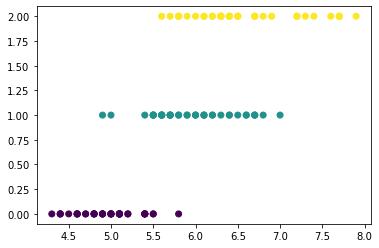

In [39]:
plt.scatter(X_train.iloc[:,0], y_train, c=y_train)

# Fit

In [40]:
mu = X_train.assign(y=y).groupby('y')['sepal length (cm)'].mean()

In [41]:
sigma = X_train.assign(y=y).groupby('y')['sepal length (cm)'].std()

In [42]:
priors = y.value_counts(1).sort_index()

In [43]:
priors

0    0.333333
1    0.333333
2    0.333333
dtype: float64

Text(0.5, 0, 'sepal length (cm)')

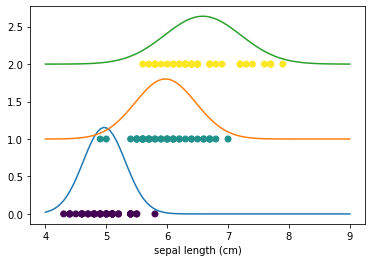

In [44]:
t = np.linspace(4, 9, 100)
plt.plot(t, scs.norm(mu, sigma).pdf(np.array([t]*3).T) + [0, 1, 2])
plt.scatter(X_train.iloc[:,0], y_train, c=y_train)
plt.xlabel(X.columns[0])

In [45]:
parametrelerimiz = scs.norm(mu, sigma)

In [46]:
(parametrelerimiz.pdf([8, 8, 8]) * priors).pipe(lambda x: x/x.sum())

0    4.272301e-16
1    3.996489e-03
2    9.960035e-01
dtype: float64

In [47]:
naive_bayes.GaussianNB().fit(X_train.iloc[:, 0:1], y_train).predict([[8]])

c:\Users\berk_\miniconda3\envs\cons1\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([2])

In [48]:
naive_bayes.GaussianNB().fit(X_train.iloc[:, 0:1], y_train).predict_proba([[8]])

c:\Users\berk_\miniconda3\envs\cons1\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([[1.92195932e-16, 3.43760213e-03, 9.96562398e-01]])

## Multivariate Gaussian

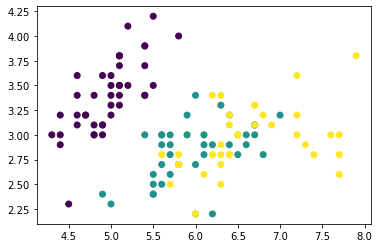

In [49]:
plt.scatter(*X_train.iloc[:,0:2].values.T, c=y_train)

In [50]:
gnb = naive_bayes.GaussianNB().fit(X_train.iloc[:,0:2], y_train)

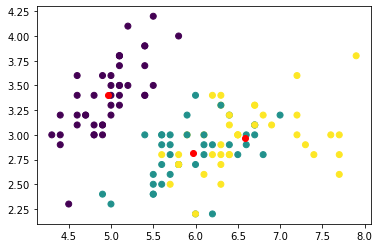

In [52]:
plt.scatter(*X_train.iloc[:,0:2].values.T, c=y_train)
plt.scatter(*gnb.theta_.T, color='red')

In [51]:
gnb.theta_

array([[4.96666667, 3.4       ],
       [5.97179487, 2.82051282],
       [6.58461538, 2.96666667]])

In [53]:
gnb.var_

array([[0.11650794, 0.13476191],
       [0.24099934, 0.08675871],
       [0.37976331, 0.0965812 ]])

In [55]:
xx, yy= np.meshgrid(np.linspace(4, 8, 100, ), np.linspace(2, 4.5, 100))

In [56]:
c1_dagilim = scs.multivariate_normal([5.02564103, 3.43589744], np.array([0.14498356, 0.16486522])**0.5)

In [57]:
zz = c1_dagilim.pdf(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)

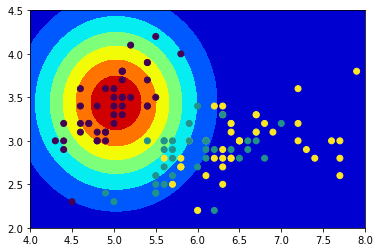

In [58]:
plt.contourf(xx, yy, zz, cmap='jet')
plt.scatter(*X_train.iloc[:,0:2].values.T, c=y_train)

P(c1 | D) = P(c1 | x1) * P(c1 | x2)

In [59]:
naive_bayes.GaussianNB().fit(X_train.iloc[:,0:2], y_train).score(X_test.iloc[:, 0:2], y_test)

0.8666666666666667

In [60]:
naive_bayes.GaussianNB(var_smoothing=1e-9).fit(X_train, y_train).score(X_test, y_test)

0.9333333333333333

## Naive Bayes

- Bayes teoremi
- Generatif bir model
    - Yeni bir class eklense dahi ogrenebilir
- Online ogrenme
- Dagilimlar (her sinif icin feature'larin dagilimi) P(feature=X | sinif)
- Naive: dagilimlarin birbirinden bagimsiz oldugu kabulu
- Farkli veri tipleri farkli olasilik modellemeleri gerektirebilir
    - Devamli degiskenler: Gaussian
    - Frekans/binary : Multinomial/Bernoulli NB
- Smoothing: 
    - Kategori/binary: training setinde gorunmeyen feature'lari test'de yok saymamak icin
    - Gaussian: varyans 0 cikmasin, sayisal stabilite
- 

In [ ]:
model = naive_bayes.GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
model = naive_bayes.GaussianNB()

In [62]:
model.theta_

array([[4.96666667, 3.4       , 1.44285714, 0.24047619],
       [5.97179487, 2.82051282, 4.29230769, 1.33076923],
       [6.58461538, 2.96666667, 5.58205128, 2.02564103]])

In [63]:
model.var_

array([[0.11650794, 0.13476191, 0.02721089, 0.01145692],
       [0.24099935, 0.08675871, 0.18788955, 0.04213018],
       [0.37976332, 0.0965812 , 0.28916503, 0.08395793]])

In [574]:
model.partial_fit(X_test, y_test)

GaussianNB()

In [575]:
model.theta_

array([[5.006, 3.428, 1.462, 0.246],
       [5.936, 2.77 , 4.26 , 1.326],
       [6.588, 2.974, 5.552, 2.026]])

In [576]:
model.var_

array([[0.121764, 0.140816, 0.029556, 0.010884],
       [0.261104, 0.0965  , 0.2164  , 0.038324],
       [0.396256, 0.101924, 0.298496, 0.073924]])

In [577]:
model = naive_bayes.GaussianNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9333333333333333

In [578]:
model.theta_

array([[5.0425    , 3.4375    , 1.4725    , 0.2425    ],
       [5.93181818, 2.77045455, 4.23863636, 1.31363636],
       [6.58333333, 2.95      , 5.525     , 2.01388889]])

In [579]:
model.var_

array([[0.11894375, 0.11284375, 0.02449375, 0.01244375],
       [0.25671488, 0.09208161, 0.20646178, 0.03345042],
       [0.43861111, 0.09472223, 0.30520834, 0.06952932]])

In [65]:
N = X_train.shape[0]
N

120

In [66]:
y_train.iloc[0:0+1]

99    1
dtype: int32

## Online learning: partial fit

Ornekleri tek tek gormek ile toptan gormek arasinda NB icin fark yok.

In [67]:
model = naive_bayes.GaussianNB()
for i in range(N-1, -1, -1):
    model.partial_fit(X_train.iloc[i:i+1], y_train.iloc[i:i+1], classes=[0, 1, 2])

In [68]:
model.score(X_test, y_test)

0.9333333333333333

In [69]:
model.theta_

array([[4.96666667, 3.4       , 1.44285714, 0.24047619],
       [5.97179487, 2.82051282, 4.29230769, 1.33076923],
       [6.58461538, 2.96666667, 5.58205128, 2.02564103]])

In [70]:
model.var_

array([[0.11650794, 0.1347619 , 0.02721088, 0.01145692],
       [0.24099934, 0.08675871, 0.18788955, 0.04213018],
       [0.37976331, 0.0965812 , 0.28916502, 0.08395792]])

## Karar sinirlari

In [71]:
from ipywidgets import interact

In [72]:
@interact(c1_prior_rel=(1,10,1), c2_prior_rel=(1, 10, 1), c3_prior_rel=(1, 10, 1), var_smoothing_e=(-9,2,1))
def nbviz(c1_prior_rel=1, c2_prior_rel=1, c3_prior_rel=1, var_smoothing_e=-9):
    priors = np.array([c1_prior_rel, c2_prior_rel, c3_prior_rel])
    priors = priors / priors.sum()
    irismodel = naive_bayes.GaussianNB(priors=priors, var_smoothing=10**var_smoothing_e)
    irismodel.fit(X.iloc[:, :2], y)
    ss, dd = np.meshgrid(np.linspace(4, 8, 100), np.linspace(1, 5, 100))
    pp = irismodel.predict(pd.DataFrame(np.array([ss.ravel(), dd.ravel()]).T, columns=X.columns[:2])).reshape(ss.shape)
    plt.contourf(ss, dd, pp)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='black')
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])


interactive(children=(IntSlider(value=1, description='c1_prior_rel', max=10, min=1), IntSlider(value=1, descri…